# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# Import Data

In [ ]:
df = pd.read_csv("Img_Features_Norm (1).csv")
imgs = df["Unnamed: 0"]
imgs = list(imgs)
df.index = imgs
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Variance,EM Variance,Local Variance,EM Local Variance,Entropy,Crofton Perimeter,Standard Deviation,Partial Derivative Sum,Number of Corners,Average Corner Strength,Sobel V Color Avg,Sobel V Gray Avg,Sobel H Color Avg,Sobel H Gray Avg,Laplacian Positive Color Avg,Laplacian Positive Gray Avg,Laplacian Negative Color Avg,Laplacian Negative Gray Avg,Class
046TE_039500.jpg,0.818257,0.693422,0.673303,0.523358,0.786564,0.420360,0.904576,0.384424,0.197567,0.150730,0.252045,0.534849,0.671998,0.574316,0.871268,0.643220,0.901998,0.900533,1
030FD_069750.jpg,0.229388,0.413471,0.187847,0.207935,0.938648,0.112804,0.478944,0.261055,0.380254,0.210888,0.245834,0.645475,0.536076,0.641298,0.778897,0.651590,0.824483,0.790577,1
030FD_036825.jpg,0.386879,0.581701,0.151492,0.193129,0.980419,0.112804,0.621996,0.155249,0.066847,0.014989,0.334500,0.605327,0.614408,0.588053,0.677562,0.590347,0.754956,0.530097,1
030FD_013375.jpg,0.060758,0.049653,0.228389,0.125328,0.669828,0.112804,0.246492,0.031395,0.035355,0.011874,0.065456,0.057880,0.050329,0.100499,0.177277,0.613944,0.147380,0.572948,1
038RB_064725.jpg,0.558283,0.652509,0.414603,0.316632,0.982594,0.160489,0.747184,0.290692,0.180469,0.061351,0.035937,0.000000,0.035556,0.119365,0.124795,0.600264,0.075910,0.388774,1


In [ ]:
'''
df2 = pd.read_csv("newdata.csv")
df2
'''

'\ndf2 = pd.read_csv("newdata.csv")\ndf2\n'

In [ ]:
'''
df = df.drop(["Sobel V Color Avg", "Sobel V Gray Avg", "Sobel H Color Avg", "Sobel H Gray Avg",
              "Laplacian Positive Color Avg", "Laplacian Positive Gray Avg", "Laplacian Negative Color Avg",
              "Laplacian Negative Gray Avg"], axis=1)

new_cols = ["sobelv_rat", "sobelh_rat", "lappos_rat", "lapneg_rat", "sobelv_gavg", "sobelh_gavg", "lappos_gavg", "lapneg_gavg"]
for new_col in new_cols:
  df.insert(0, new_col, [1.0]*len(df))

for i in range(len(df)):
  for j in range(len(df2)):
    if df.index[i] == df2["File"][j]:
      for new_col in new_cols:
        df[new_col][i] = df2[new_col][j] / max(df2[new_col])

df.head()
'''

'\ndf = df.drop(["Sobel V Color Avg", "Sobel V Gray Avg", "Sobel H Color Avg", "Sobel H Gray Avg",\n              "Laplacian Positive Color Avg", "Laplacian Positive Gray Avg", "Laplacian Negative Color Avg",\n              "Laplacian Negative Gray Avg"], axis=1)\n\nnew_cols = ["sobelv_rat", "sobelh_rat", "lappos_rat", "lapneg_rat", "sobelv_gavg", "sobelh_gavg", "lappos_gavg", "lapneg_gavg"]\nfor new_col in new_cols:\n  df.insert(0, new_col, [1.0]*len(df))\n\nfor i in range(len(df)):\n  for j in range(len(df2)):\n    if df.index[i] == df2["File"][j]:\n      for new_col in new_cols:\n        df[new_col][i] = df2[new_col][j] / max(df2[new_col])\n\ndf.head()\n'

In [ ]:
np.array(df.loc[imgs[0]][:-1])
X = []
y = []
for img in imgs:
  X.append(df.loc[img][:-1])
  y.append(df.loc[img][-1])

X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X, y)
feats = df.columns[:-1]
imps = regr.feature_importances_

for i in range(len(feats)):
  print(feats[i], ": ", round(imps[i], 2))

Variance :  0.02
EM Variance :  0.04
Local Variance :  0.01
EM Local Variance :  0.0
Entropy :  0.03
Crofton Perimeter :  0.0
Standard Deviation :  0.01
Partial Derivative Sum :  0.13
Number of Corners :  0.2
Average Corner Strength :  0.18
Sobel V Color Avg :  0.21
Sobel V Gray Avg :  0.05
Sobel H Color Avg :  0.03
Sobel H Gray Avg :  0.04
Laplacian Positive Color Avg :  0.01
Laplacian Positive Gray Avg :  0.0
Laplacian Negative Color Avg :  0.03
Laplacian Negative Gray Avg :  0.01


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

regr = RandomForestClassifier(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[134,   4],
       [ 13,  15]])

- all data 
- 1 layer : 128
- activation = relu
- epochs = 75

135 | 3

12 | 16

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=75)

Epoch 1/75
24/24 [==============================] - 1s 2ms/step - loss: 0.4504 - accuracy: 0.8364
Epoch 2/75
24/24 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8364
Epoch 3/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8364
Epoch 4/75
24/24 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8364
Epoch 5/75
24/24 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8364
Epoch 6/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8364
Epoch 7/75
24/24 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8364
Epoch 8/75
24/24 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8378
Epoch 9/75
24/24 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8471
Epoch 10/75
24/24 [==============================] - 0s 3ms/step - loss: 0.2807 - accuracy: 0.8524
Epoch 11/75
24/24 [

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,   4],
       [ 12,  16]], dtype=int32)>

- all data
- 2 layers : 10
- activation = relu
- epochs = 100

[135,   3],

[ 12,  16]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.8218
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.8364
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8364
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8364
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8364
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8364
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8364
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8364
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8364
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8364
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [ 12,  16]], dtype=int32)>

- all data
- 3 layers : 10
- activation = relu
- epochs = 100

[136,   2],

[ 13,  15]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6024 - accuracy: 0.8364
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.8364
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8364
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8364
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8364
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8364
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8364
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8364
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8364
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8364
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,   4],
       [ 12,  16]], dtype=int32)>

- all data
- 2 layers : 50 
- activation = relu
- epochs = 100

[133,   5],
       
[ 11,  17]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5186 - accuracy: 0.8364
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8364
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8364
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8364
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8404
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8524
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.8670
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.8777
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.8856
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.8883
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[137,   1],
       [ 11,  17]], dtype=int32)>

- all data 
- 2 layers : 50
- activation = relu
- epochs = 500

[135,   3],

[ 12,  16]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8364
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8364
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8364
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8378
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.8431
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8710
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8670
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8830
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.8896
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,   4],
       [ 10,  18]], dtype=int32)>

In [ ]:
def get_spec_feats(X, idxs):
  new_X = []
  for x in range(len(X)):
    new_row = []
    for i in range(len(X[x])):
      if i in idxs:
        new_row.append(X[x][i])
    new_X.append(new_row)
  return np.array(new_X)

imp_X_train = get_spec_feats(X_train, [7, 8, 9, 10])
imp_X_test = get_spec_feats(X_test, [7, 8, 9, 10]) 

- corners, avg corners, sobel v color avg, sobel v gray avg
- 2 layers : 50
- activation = relu
- epochs = 500

[133,   5],

[ 11,  17]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.6657 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8364
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8364
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8364
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8364
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8364
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8364
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8364
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8457
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2696 - accuracy: 0.8604
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [ 11,  17]], dtype=int32)>

- corners, avg corners, sobel v color avg, sobel v gray avg
- 1 layers : 10
- activation = relu
- epochs = 500

[135,   3],

[ 13,  15]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.7940 - accuracy: 0.8178
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.8364
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.8364
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.8364
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.8364
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8364
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8364
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8364
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8364
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8364
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [ 13,  15]], dtype=int32)>

- corners, avg corners, sobel v color avg, sobel v gray avg
- 1 layers : 128
- activation = relu
- epochs = 500

[134,   4],

[ 13,  15]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.5907 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.8364
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8364
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8364
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8364
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8364
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8364
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8364
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8364
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8364
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [ 13,  15]], dtype=int32)>

- use regularization
- use different layers


In [ ]:
imp_X_train = get_spec_feats(X_train, [1, 6, 7, 8, 9, 10, 11, 12])
imp_X_test = get_spec_feats(X_test, [1, 6, 7, 8, 9, 10, 11, 12])

In [ ]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8364
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8364
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8590
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.8750
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.8763
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8883
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.8976
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.8976
Epoch 10/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.8989
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135,   3],
       [  9,  19]], dtype=int32)>

In [ ]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8431
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.8617
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.8816
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.8923
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.8910
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2285 - accuracy: 0.8989
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.9003
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9003
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9016
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[129,   9],
       [  6,  22]], dtype=int32)>

In [ ]:
imp_X_train = get_spec_feats(X_train, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
imp_X_test = get_spec_feats(X_test, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8364
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.8577
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.8923
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.8896
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9003
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.9029
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9003
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9069
Epoch 9/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.9056
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.8936
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[130,   8],
       [  8,  20]], dtype=int32)>

In [ ]:
from keras import regularizers
from keras.layers import Conv1D

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='elu'),
    tf.keras.layers.Dense(10, activation='elu'),
    tf.keras.layers.Dense(10, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=300)

Epoch 1/300
24/24 [==============================] - 1s 3ms/step - loss: 0.6226 - accuracy: 0.6582
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8364
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.8364
Epoch 4/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8364
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8364
Epoch 6/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8364
Epoch 7/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8364
Epoch 8/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8364
Epoch 9/300
24/24 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8364
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8364
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,   4],
       [ 12,  16]], dtype=int32)>

# Best Model 
- 4 layers : 128
- activation : 2 tanh, 2 elu
- linear output / from_logits

accuracy = ~96%

[137,   1],

[  6,  22]

In [ ]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=400)

Epoch 1/400
24/24 [==============================] - 2s 8ms/step - loss: 0.3679 - accuracy: 0.8378
Epoch 2/400
24/24 [==============================] - 0s 9ms/step - loss: 0.2710 - accuracy: 0.8910
Epoch 3/400
24/24 [==============================] - 0s 8ms/step - loss: 0.2386 - accuracy: 0.8989
Epoch 4/400
24/24 [==============================] - 0s 11ms/step - loss: 0.2647 - accuracy: 0.8830
Epoch 5/400
24/24 [==============================] - 0s 8ms/step - loss: 0.3049 - accuracy: 0.8856
Epoch 6/400
24/24 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.8870
Epoch 7/400
24/24 [==============================] - 0s 6ms/step - loss: 0.2368 - accuracy: 0.8949
Epoch 8/400
24/24 [==============================] - 0s 7ms/step - loss: 0.2242 - accuracy: 0.9016
Epoch 9/400
24/24 [==============================] - 0s 7ms/step - loss: 0.2269 - accuracy: 0.9003
Epoch 10/400
24/24 [==============================] - 0s 7ms/step - loss: 0.2284 - accuracy: 0.8949
Epoch 11

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= 0:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,   4],
       [  7,  21]], dtype=int32)>

In [ ]:
wrong_x = []
for i in range(len(y_pred_bin)):
  if y_pred_bin[i] != y_test[i]:
    wrong_x.append(X_test[i])

print(wrong_x)

[array([0.31419866, 0.58419954, 0.35994594, 0.32163379, 0.98907541,
       0.11976663, 0.56053426, 0.29007807, 0.18444176, 0.0626929 ,
       0.29312584, 0.58650794, 0.48340935, 0.55312461, 0.65090814,
       0.6843934 , 0.6367259 , 0.58136754]), array([0.48102571, 0.60650808, 0.11841239, 0.07389725, 0.97350456,
       0.28541236, 0.69356017, 0.20304075, 0.14925719, 0.05771404,
       0.42434042, 0.72698627, 0.59614407, 0.65790763, 0.78521588,
       0.55221258, 0.90185064, 0.95513086]), array([0.39606923, 0.52155873, 0.21529838, 0.19300832, 0.96121564,
       0.27203727, 0.62934031, 0.40514813, 0.30234117, 0.14327782,
       0.28440705, 0.71212495, 0.57463463, 0.66767246, 0.69923181,
       0.5957209 , 0.79887353, 0.85230555]), array([0.42163449, 0.44648309, 0.36497271, 0.19453863, 0.96363519,
       0.26923052, 0.64933388, 0.51423745, 0.42797948, 0.20081241,
       0.36343426, 0.58287168, 0.70092745, 0.69777302, 0.87774362,
       0.65880283, 0.92134575, 0.83108835]), array([0.419627

In [ ]:
def check_each(l1, l2):
  all_eq = True
  for i in range(len(l1)):
    if l1[i] != l2[i]:
      all_eq = False
  return all_eq

wrong_imgs = []
for img in imgs:
  if sum([check_each(list(df.loc[img][:-1]), i) for i in wrong_x]) == 1:
    wrong_imgs.append((img, df.loc[img][-1]))

print(wrong_imgs)

[('030FD_073925.jpg', 1.0), ('030FD_037700.jpg', 1.0), ('030FD_021800.jpg', 1.0), ('030FD_072850.jpg', 1.0), ('030FD_069850.jpg', 1.0), ('030FD_022025.jpg', 1.0), ('030FD_020800.jpg', 1.0), ('030FD_068150.jpg', 1.0), ('030FD_039475.jpg', 0.0), ('046TE_055600.jpg', 0.0), ('030FD_038500.jpg', 0.0), ('030FD_036600.jpg', 0.0)]


In [ ]:
imp_X_train = get_spec_feats(X_train, [1, 2, 4, 6, 7, 8, 9, 10, 12, 14, 16])
imp_X_test = get_spec_feats(X_test, [1, 2, 4, 6, 7, 8, 9, 10, 12, 14, 16])

In [ ]:
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(100, activation='elu', use_bias=False),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8351
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8644
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2614 - accuracy: 0.9003
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.8843
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.8976
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9016
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9029
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.8923
Epoch 9/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.8963
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.8976
Epoch 11/

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[128,  10],
       [ 10,  18]], dtype=int32)>

# Autoencoder For Dim Reduction 

In [ ]:
imp_X_train = get_spec_feats(X_train, [0, 1, 2, 4, 6, 7, 8, 9, 10, 12, 14, 16])
imp_X_test = get_spec_feats(X_test, [0, 1, 2, 4, 6, 7, 8, 9, 10, 12, 14, 16])

In [ ]:
from keras import regularizers

autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(12)
])

autoencoder.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
autoencoder.fit(imp_X_train, imp_X_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.0027 
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.0027
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.0013
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.0013
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.0027
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.0027
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.0027
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.0027
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.0027
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.0027
Epoch 11

In [ ]:
from keras import backend as K
keras_function = K.function([autoencoder.input], [autoencoder.layers[0].output])
array = keras_function(imp_X_train)

In [ ]:
print(array[0][0])

for i in array[0]:
  print(i)

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0.         0.07520822 0.        ]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0.         0.01068988 0.        ]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.

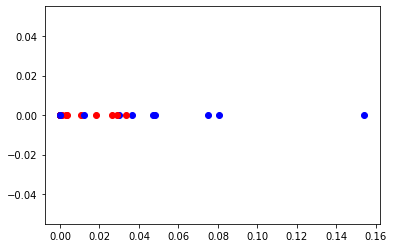

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(y_train)):
  if y_train[i] == 0:
    plt.plot(array[0][i][1], array[0][i][2], "ro")
  else:
    plt.plot(array[0][i][1], array[0][i][2], "bo")


In [ ]:
imp_X_train = get_spec_feats(X_train, [0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
imp_X_test = get_spec_feats(X_test, [0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(imp_X_train, y_train, validation_data=(imp_X_test, y_test), epochs=300)

Epoch 1/300
24/24 [==============================] - 2s 31ms/step - loss: 0.3817 - accuracy: 0.8471 - val_loss: 0.2463 - val_accuracy: 0.9096
Epoch 2/300
24/24 [==============================] - 0s 11ms/step - loss: 0.2531 - accuracy: 0.8910 - val_loss: 0.2685 - val_accuracy: 0.9036
Epoch 3/300
24/24 [==============================] - 0s 10ms/step - loss: 0.2417 - accuracy: 0.9029 - val_loss: 0.2075 - val_accuracy: 0.8976
Epoch 4/300
24/24 [==============================] - 0s 13ms/step - loss: 0.2450 - accuracy: 0.8910 - val_loss: 0.1934 - val_accuracy: 0.9036
Epoch 5/300
24/24 [==============================] - 0s 11ms/step - loss: 0.2333 - accuracy: 0.9016 - val_loss: 0.2190 - val_accuracy: 0.9217
Epoch 6/300
24/24 [==============================] - 0s 12ms/step - loss: 0.2265 - accuracy: 0.9003 - val_loss: 0.2011 - val_accuracy: 0.9096
Epoch 7/300
24/24 [==============================] - 0s 9ms/step - loss: 0.2592 - accuracy: 0.8870 - val_loss: 0.2026 - val_accuracy: 0.9157
Epoch 8

In [ ]:
y_pred = model.predict(imp_X_test)
y_pred_bin = np.zeros(len(y_pred))
for pred in range(len(y_pred)):
  if y_pred[pred] >= .5:
    y_pred_bin[pred] = 1
  else:
    y_pred_bin[pred] = 0
    
tf.math.confusion_matrix(y_test,y_pred_bin)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[133,   5],
       [  6,  22]], dtype=int32)>

In [ ]:
wrong_x = []
for i in range(len(y_pred_bin)):
  if y_pred_bin[i] != y_test[i]:
    wrong_x.append(X_test[i])

wrong_imgs = []
for img in imgs:
  if sum([check_each(list(df.loc[img][:-1]), i) for i in wrong_x]) == 1:
    wrong_imgs.append((img, df.loc[img][-1]))

print(wrong_imgs)

[('030FD_073925.jpg', 1.0), ('030FD_052850.jpg', 1.0), ('030FD_037700.jpg', 1.0), ('030FD_072850.jpg', 1.0), ('030FD_022025.jpg', 1.0), ('030FD_064375.jpg', 1.0), ('030FD_068100.jpg', 1.0), ('030FD_038500.jpg', 0.0), ('046TE_073975.jpg', 0.0), ('030FD_017650.jpg', 0.0), ('046TE_070875.jpg', 0.0), ('030FD_036600.jpg', 0.0)]
